In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 2 (80-10-10).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,CCI,PMI,REERI,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,98,53,109,11,59,32,8,58,7,...,27,58,29,18,20,0,32,0,8,Train
2008-01-02,411032,91,53,108,0,51,0,0,46,6,...,27,58,31,10,19,5,39,7,5,Train
2008-01-03,414332,90,53,106,0,57,7,24,58,6,...,27,50,29,38,28,6,30,0,0,Train
2008-01-04,395900,83,56,106,0,51,6,9,58,6,...,27,41,30,25,22,8,45,0,8,Train
2008-01-05,366387,80,57,106,0,57,0,7,57,6,...,27,44,24,16,22,5,47,0,9,Train


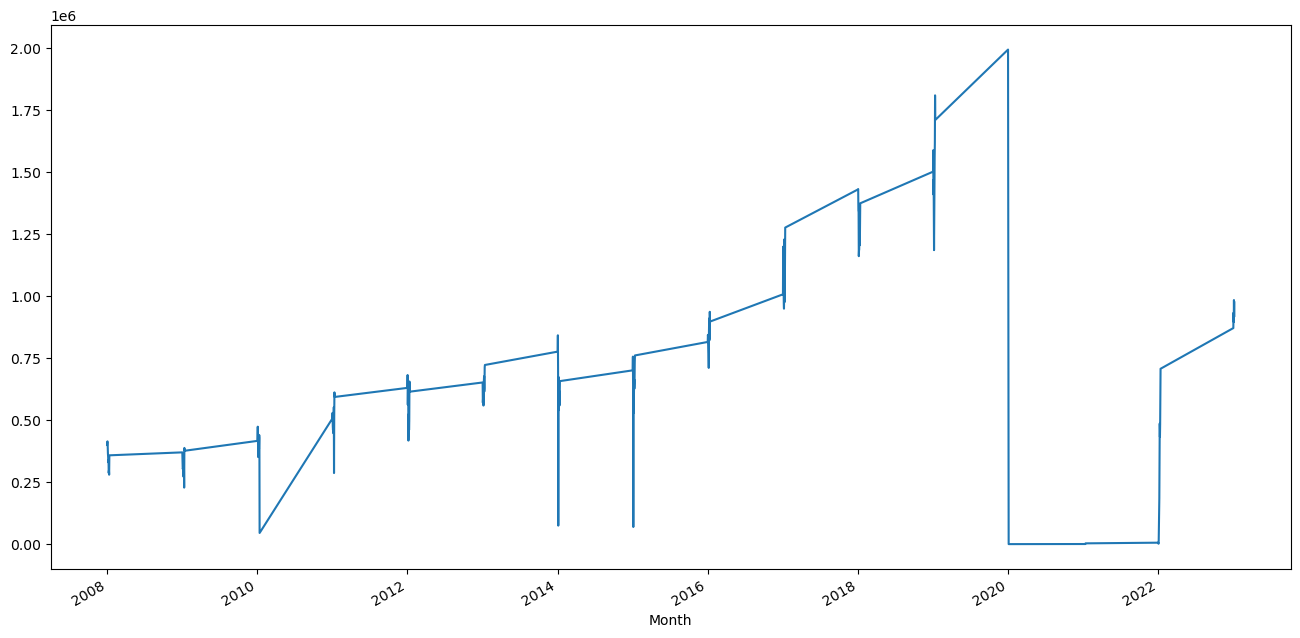

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  CCI  PMI  REERI  Airbnb Vietnam  \
Month                                                          
2008-01-01           399556   98   53    109              11   
2008-01-02           411032   91   53    108               0   
2008-01-03           414332   90   53    106               0   
2008-01-04           395900   83   56    106               0   
2008-01-05           366387   80   57    106               0   
...                     ...  ...  ...    ...             ...   
2023-01-02           932969   87   51    132              64   
2023-01-03           895425   82   48    132              65   
2023-01-04           984146   84   47    131              58   
2023-01-05           916257   79   45    131              56   
2023-01-06           975010   84   46    131              63   

            Vietnam restaurant  Shopping in Hanoi  Shopping in Ho Chi Minh  \
Month                                                                        
2008-01-01 

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.15 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.13 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.08 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.27 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.05 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.12 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.11 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.05 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/04/2020'].dropna()
test = df1['Tourist Arrival']['01/05/2020':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/04/2020'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/05/2020':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           24     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19925D+01    |proj g|=  9.55271D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   24      0      1      0     0     0   9.553D-06   1.199D+01
  F =   11.992490999604685     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  148
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1774.889
Date:                            Wed, 23 Aug 2023   AIC                           3597.777
Time:                                    22:09:40   BIC                           3667.504
Sample:                                         0   HQIC                          3626.112
                                            - 148                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
CCI                     -2317.0120   4714.072     -0.492      0.623   -1.16e+04    6922.400
PMI                       342.7732   6301.365      0.054      0.957    -1.2e+04    1.27e+04
REERI                   -7762.0917   1.06e+04     -0.735      0.462   -2.85e+04    1.29e+04
Airbnb Vietnam           -364.9480   2433.239     -0.150      0.881   -5134.010    4404.114
Vietnam restaurant       3257.1647   2974.995      1.095      0.274   -2573.719    9088.048
Shopping in Hanoi         528.8739   2870.317      0.184      0.854   -5096.844    6154.592
Shopping in Ho Chi Minh  1031.9717   3282.294      0.314      0.753   -5401.207    7465.150
Vietnam tour             1791.6987   3739.461      0.479      0.632   -5537.511    9120.908
Skyscanner               6130.1409   4677.352      1.311      0.190   -3037.301    1.53e+04
Vietnam visa             4812.6447   3929.079      1.225      0.221   -2888.208    1.25e+04
Vietnam airport          -284.7988   3880.836     -0.073      0.941   -7891.097    7321.499
Vietnam flights         -2857.7533   3886.551     -0.735      0.462   -1.05e+04    4759.747
Danang airport            217.9400   1868.580      0.117      0.907   -3444.410    3880.290
Hoi An                  -3467.8776   2105.922     -1.647      0.100   -7595.408     659.653
Vietnam weather            36.0504   2228.467      0.016      0.987   -4331.664    4403.765
Visa for Vietnam         2528.4395   4386.130      0.576      0.564   -6068.217    1.11e+04
Sgn airport              1348.1879   2229.781      0.605      0.545   -3022.103    5718.479
Phu Quoc                 4387.3494   2152.883      2.038      0.042     167.777    8606.922
Vietnam itinerary       -2664.9634   2652.751     -1.005      0.315   -7864.261    2534.334
Vietnam trip             4269.7767   2142.858      1.993      0.046      69.853    8469.700
Things to do in Hue      4139.5587   3628.319      1.141      0.254   -2971.816    1.13e+04
Vietnam backpackers     -5964.4989   3476.515     -1.716      0.086   -1.28e+04     849.345
ar.S.L12                    0.3963      0.080      4.945      0.000       0.239       0.553
sigma2                   1.539e+10      0.005   3.29e+12      0.000    1.54e+10    1.54e+10
===================================================================================
Ljung-Box (L1) (Q):                  14.49   Jarque-Bera (JB):               131.21
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.33
Prob(H) (two-sided):                  0.83   Kurtosis:                         7.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singul

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 242929.947374625


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 192201.50317505412


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 2.6351473109179797e+20


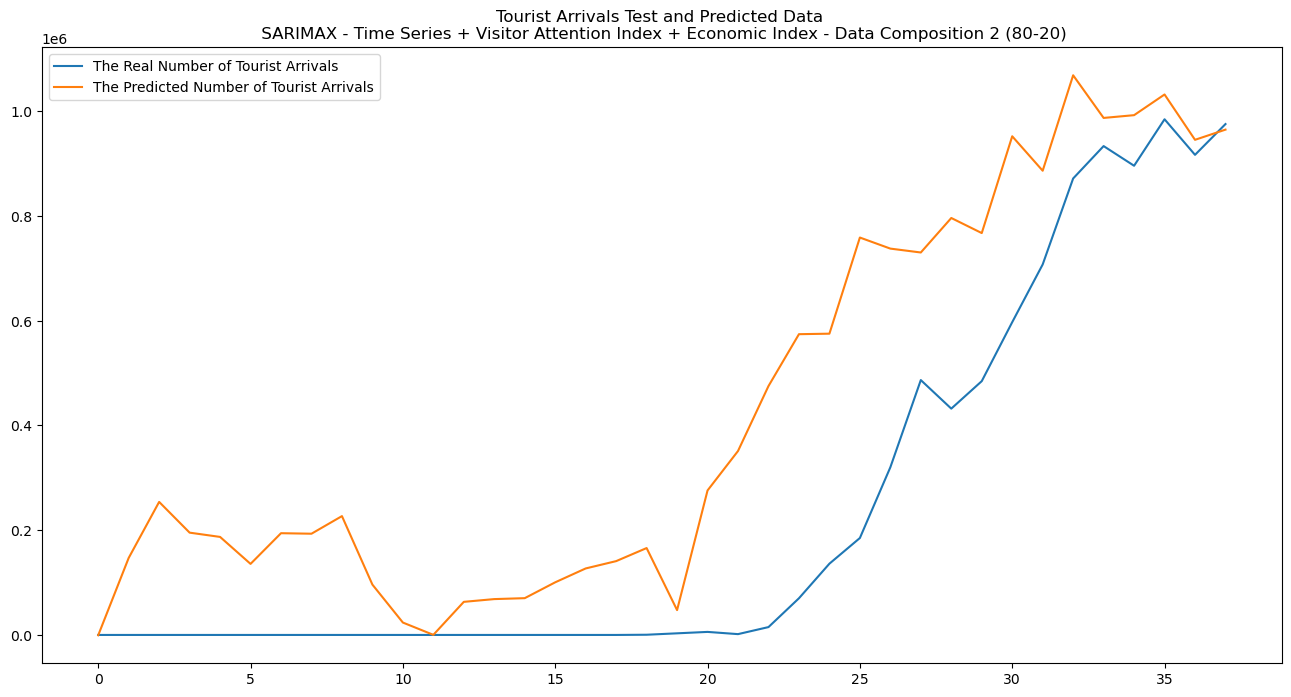

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Visitor Attention Index + Economic Index - Data Composition 2 (80-20)")
plt.legend()
plt.show()